<a href="https://colab.research.google.com/github/lankutse/ann-final/blob/main/sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Input
from keras.models import Model

num_filters = 10
filter_size = 3
pool_size = 2

# basic sequential model with flatten()

basic = keras.models.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    Conv2D(15, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(25, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(40, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(40, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(80, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='sigmoid'),
])

basic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(name = 'binary accuracy'),
                                                                     tf.keras.metrics.AUC(name = 'AUC')])

history = basic.fit(X_train, y_train, epochs=12, batch_size=100, validation_split=0.2)

# Print training results
print("Training history keys:", history.history.keys())

# Example: Print accuracy and loss after training
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

Epoch 1/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - AUC: 0.5023 - accuracy: 0.0970 - binary accuracy: 0.8004 - loss: 0.4999 - val_AUC: 0.4955 - val_accuracy: 0.0957 - val_binary accuracy: 0.8949 - val_loss: 0.3503
Epoch 2/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - AUC: 0.5080 - accuracy: 0.0895 - binary accuracy: 0.8900 - loss: 0.3772 - val_AUC: 0.4956 - val_accuracy: 0.1057 - val_binary accuracy: 0.8949 - val_loss: 0.3392
Epoch 3/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - AUC: 0.5075 - accuracy: 0.1028 - binary accuracy: 0.8929 - loss: 0.3644 - val_AUC: 0.5092 - val_accuracy: 0.1000 - val_binary accuracy: 0.8949 - val_loss: 0.3374
Epoch 4/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - AUC: 0.5102 - accuracy: 0.0959 - binary accuracy: 0.8939 - loss: 0.3617 - val_AUC: 0.5191 - val_accuracy: 0.1171 - val_binary accuracy: 0.8949 - val_loss: 0.3368
Epoch 5/12
28/28 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - AUC: 0.5206 - accuracy: 0.1214 - binary accuracy: 0.8948 - loss: 0.3546 - val_AUC: 0.52

In [ ]:
results = basic.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", results[0])
print("Binary Accuracy:", results[1])
print("AUC:", results[2])

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 484ms/step - AUC: 0.6127 - accuracy: 0.1957 - binary accuracy: 0.8955 - loss: 0.3259
Test Loss: 0.32954901456832886
Binary Accuracy: 0.17444443702697754
AUC: 0.8948888778686523


29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step


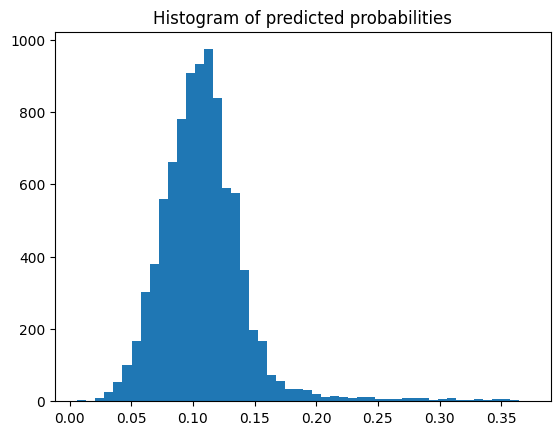

In [ ]:
import matplotlib.pyplot as plt

# plotting probabilities to see if the model predicts all 0s for all classes

y_pred_probs = basic.predict(X_test)
plt.hist(y_pred_probs.flatten(), bins=50)
plt.title("Histogram of predicted probabilities")
plt.show()

In [ ]:
print("Mean positive label rate:", y_train.mean())

Mean positive label rate: 0.10525714285714285


In [ ]:
print("Mean predicted probability:", np.mean(y_pred_probs))

Mean predicted probability: 0.10818974


In [ ]:
threshold = 0.2
y_pred_binary = (y_pred_probs >= threshold).astype(int)

from sklearn.metrics import accuracy_score, f1_score
print("Binary Accuracy:", accuracy_score(y_test.flatten(), y_pred_binary.flatten()))
print("F1 Score:", f1_score(y_test.flatten(), y_pred_binary.flatten()))

Binary Accuracy: 0.8866666666666667
F1 Score: 0.0941385435168739


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

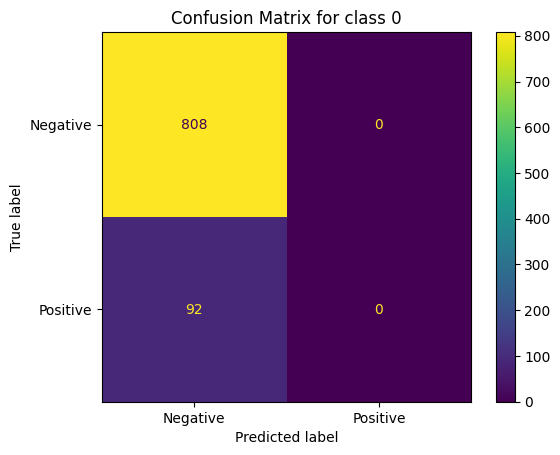

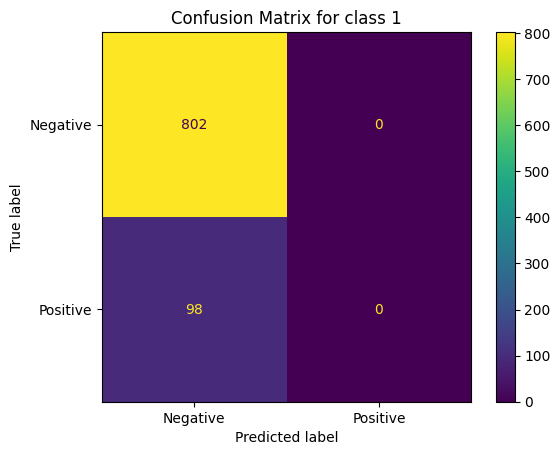

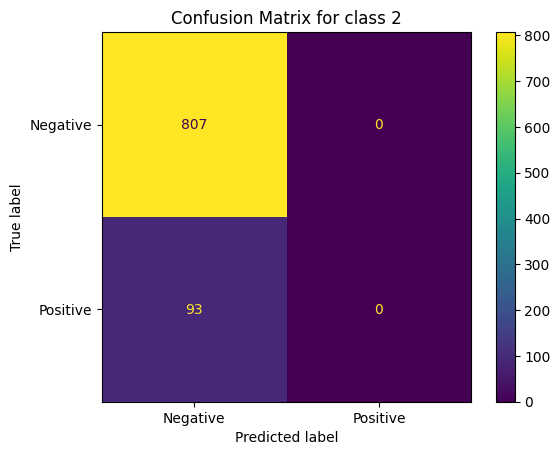

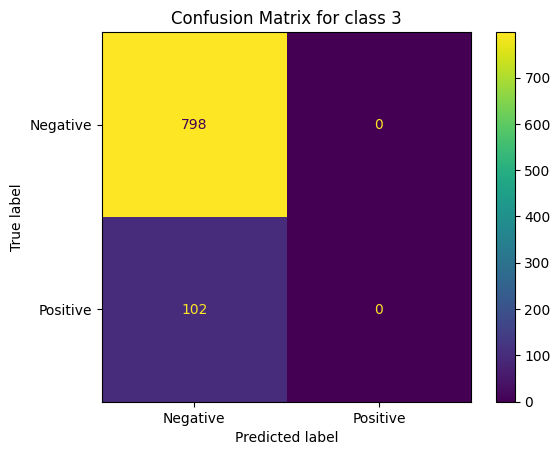

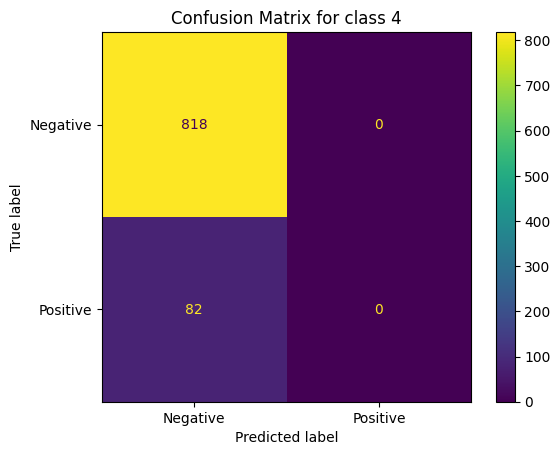

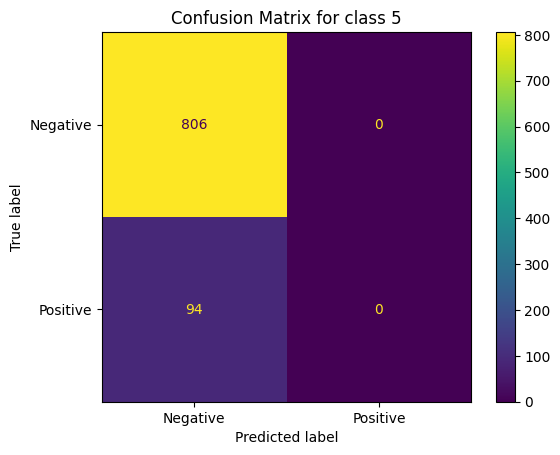

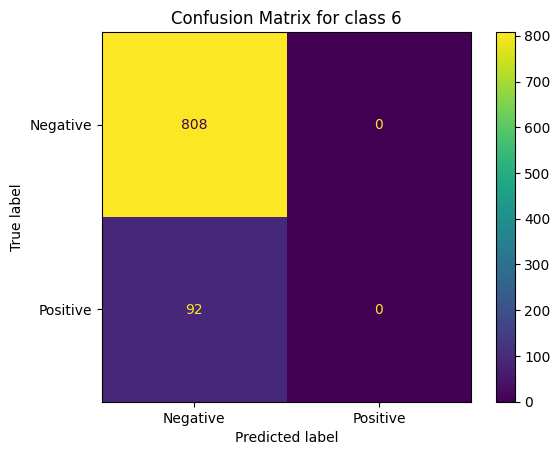

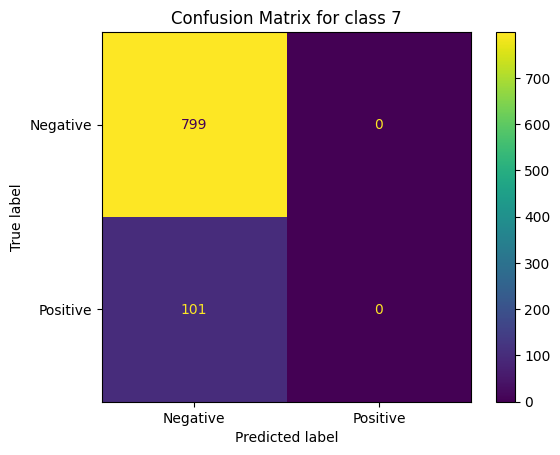

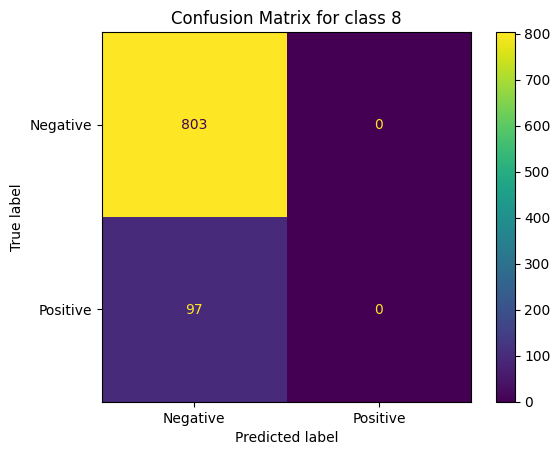

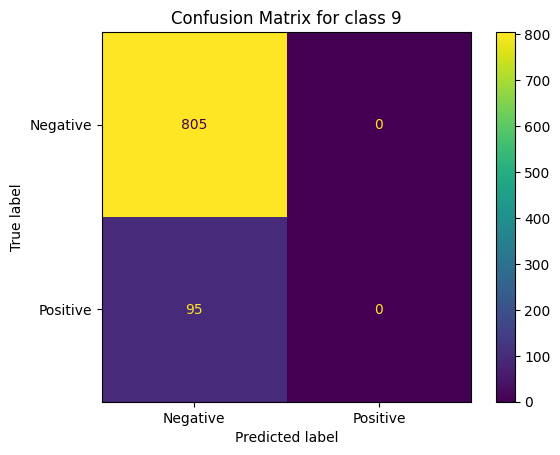

In [ ]:
for i in range(10):
    y_pred_binary = (y_pred_probs[:, i] >= 0.5).astype(int)
    y_true_binary = y_test[:, i]

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
    plt.title(f"Confusion Matrix for class {i}")
    plt.show()

In [ ]:
# Everything after the first 3500 rows in train_df
train_df_rest = train_df.iloc[3500:]

# Everything after the first 900 rows in test_df
test_df_rest = test_df.iloc[900:]

In [ ]:
num_classes = sampled_games['label'].max() + 1

X_train2, y_train2 = load_images(train_df_rest, poster_dir, num_classes=num_classes)
X_test2, y_test2 = load_images(test_df_rest, poster_dir, num_classes=num_classes)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Input
from keras.models import Model

num_filters = 10
filter_size = 3
pool_size = 2

# deeper sequential model with global max pooling instead of flatten()

basic = keras.models.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    Conv2D(20, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(30, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(45, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(45, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=pool_size),
    GlobalMaxPooling2D(),
    Dense(90, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='sigmoid'),
])

basic.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(name = 'binary accuracy'),
                                                                     tf.keras.metrics.AUC(name = 'AUC')])

history = basic.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2)

# Print training results
print("Training history keys:", history.history.keys())

# Example: Print accuracy and loss after training
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 186s 7s/step - AUC: 0.4958 - accuracy: 0.1038 - binary accuracy: 0.5273 - loss: 0.6894 - val_AUC: 0.5158 - val_accuracy: 0.1014 - val_binary accuracy: 0.7974 - val_loss: 0.6420
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - AUC: 0.4943 - accuracy: 0.0839 - binary accuracy: 0.7203 - loss: 0.6237 - val_AUC: 0.5061 - val_accuracy: 0.1014 - val_binary accuracy: 0.8160 - val_loss: 0.5016
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - AUC: 0.5031 - accuracy: 0.1035 - binary accuracy: 0.7967 - loss: 0.5017 - val_AUC: 0.4929 - val_accuracy: 0.0871 - val_binary accuracy: 0.8951 - val_loss: 0.3786
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 183s 7s/step - AUC: 0.5085 - accuracy: 0.1058 - binary accuracy: 0.8413 - loss: 0.4435 - val_AUC: 0.4914 - val_accuracy: 0.0957 - val_binary accuracy: 0.8951 - val_loss: 0.3689
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - AUC: 0.4856 - accuracy: 0.0891 - binary accuracy: 0.8516 - loss: 0.4371 - val_AUC: 0.49

In [ ]:
results = basic.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", results[0])
print("Binary Accuracy:", results[1])
print("AUC:", results[2])

29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 680ms/step - AUC: 0.5011 - accuracy: 0.1230 - binary accuracy: 0.8953 - loss: 0.3487
Test Loss: 0.3510488271713257
Binary Accuracy: 0.11666666716337204
AUC: 0.894444465637207


29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 632ms/step


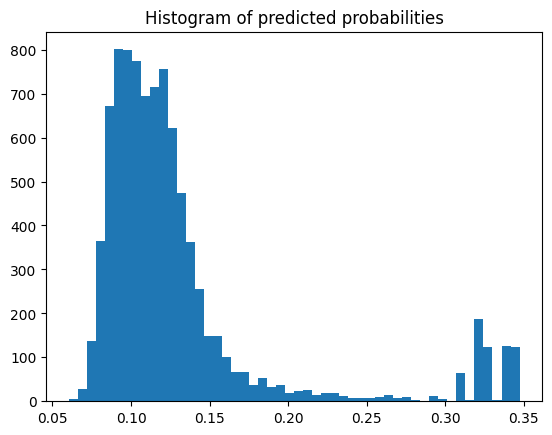

In [ ]:
import matplotlib.pyplot as plt

y_pred_probs = basic.predict(X_test)
plt.hist(y_pred_probs.flatten(), bins=50)
plt.title("Histogram of predicted probabilities")
plt.show()

In [ ]:
print("Mean positive label rate:", y_train.mean())

print("Mean predicted probability:", np.mean(y_pred_probs))

threshold = 0.2
y_pred_binary = (y_pred_probs >= threshold).astype(int)

from sklearn.metrics import accuracy_score, f1_score
print("Binary Accuracy:", accuracy_score(y_test.flatten(), y_pred_binary.flatten()))
print("F1 Score:", f1_score(y_test.flatten(), y_pred_binary.flatten()))

Mean positive label rate: 0.10551428571428571
Mean predicted probability: 0.13119009
Binary Accuracy: 0.8202222222222222
F1 Score: 0.09608938547486033


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

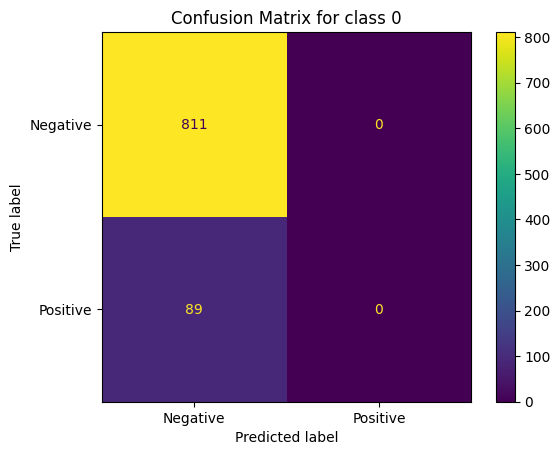

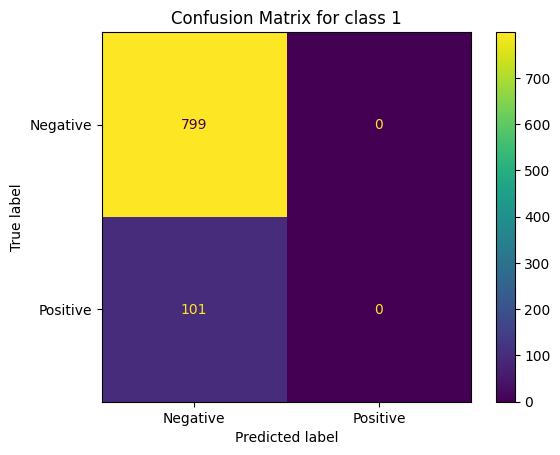

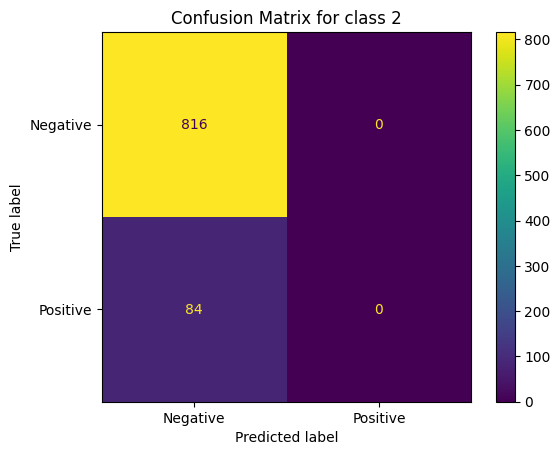

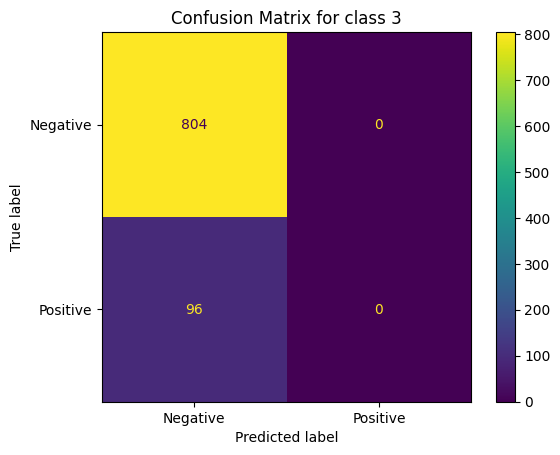

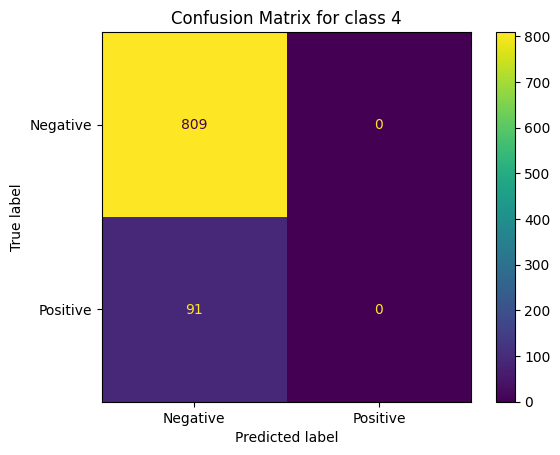

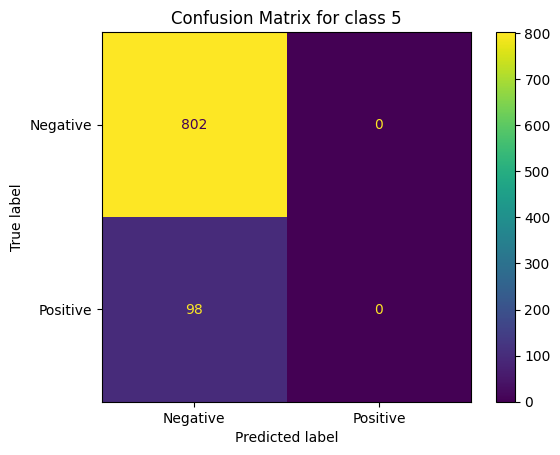

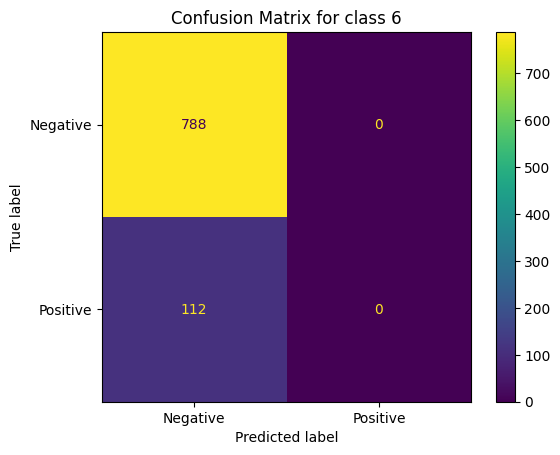

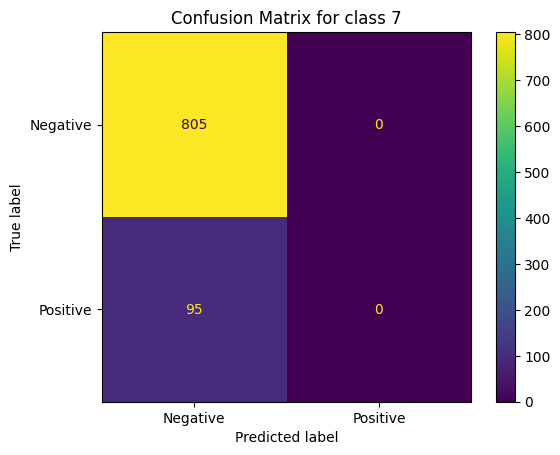

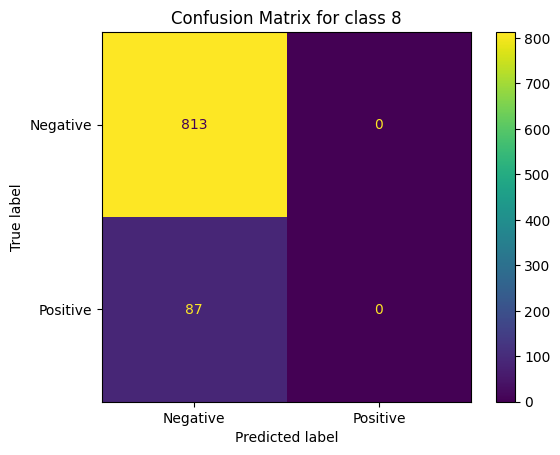

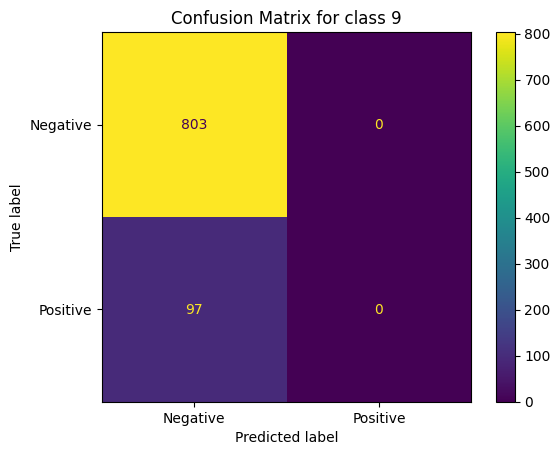

In [ ]:
for i in range(10):
    y_pred_binary = (y_pred_probs[:, i] >= 0.5).astype(int)
    y_true_binary = y_test[:, i]

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
    plt.title(f"Confusion Matrix for class {i}")
    plt.show()